In [13]:
import os, shutil
from keras import layers, models
from tensorflow.keras import optimizers

# Create folders and datasets

In [3]:
base_dir = '/Users/bytedance/Documents/playground/CNN/data/cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [4]:
original_dataset_dir = '/Users/bytedance/Documents/playground/CNN/data/dog_cat_train'
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)

In [5]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [6]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test cat images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test cat images: 500


# Build Model

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3))) #input shape is an arbitary number
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [15]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/opt/homebrew/anaconda3/envs/py38/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


# Data Preprocessing

Read picture files -> Decode the JPEG content to RGB grids of pixels -> Convert into floating point tensors -> Rescale the pixel values (0 to 255) to [0,1] interval (normalization)

In [16]:
from keras.preprocessing.image import ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150), #resize all images to (150,150)
    batch_size=20,
    class_mode = 'binary' #need binary label
    )

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150), #resize all images to (150,150)
    batch_size=20,
    class_mode = 'binary' #need binary label
    )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape) #20 samples per batch, 150x150 size, 3 channels
    print('labels batch shape:', labels_batch.shape) #20samples, each sample is a binary class
    break #it loops endlessly over all images in train_dataset, so need to break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


# Train the model

In [19]:
history = model.fit_generator( #use fit_generator instead of fit
    train_generator, #yield train data batch endlessly
    steps_per_epoch=100, #2000 total training data, each batch is 20, so need 100 steps to complete 1 epoch
    epochs = 30, 
    validation_data = validation_generator,
    validation_steps=50) #1000 total validation data, each batch is 20, so need 1000 steps to complete 1 epoch


/opt/homebrew/anaconda3/envs/py38/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2024-05-19 11:06:01.539019: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2024-05-19 11:06:01.539205: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/30
100/100 [==============================] - 16s 156ms/step - loss: 0.6818 - acc: 0.5465 - val_loss: 0.6499 - val_acc: 0.6280
Epoch 2/30
100/100 [==============================] - 16s 159ms/step - loss: 0.6396 - acc: 0.6210 - val_loss: 0.6105 - val_acc: 0.6680
Epoch 3/30
100/100 [==============================] - 17s 174ms/step - loss: 0.5889 - acc: 0.6875 - val_loss: 0.6756 - val_acc: 0.6200
Epoch 4/30
100/100 [==============================] - 17s 166ms/step - loss: 0.5543 - acc: 0.7255 - val_loss: 0.5711 - val_acc: 0.7000
Epoch 5/30
100/100 [==============================] - 17s 169ms/step - loss: 0.5315 - acc: 0.7390 - val_loss: 0.5617 - val_acc: 0.7060
Epoch 6/30
100/100 [==============================] - 17s 166ms/step - loss: 0.5151 - acc: 0.7450 - val_loss: 0.5545 - val_acc: 0.7140
Epoch 7/30
100/100 [==============================] - 17s 171ms/step - loss: 0.4900 - acc: 0.7630 - val_loss: 0.5778 - val_acc: 0.6950
Epoch 8/30
100/100 [==============================] - 1

In [20]:
model.save('cats_and_dogs_small_1.h5')

## Overfitting

In [21]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

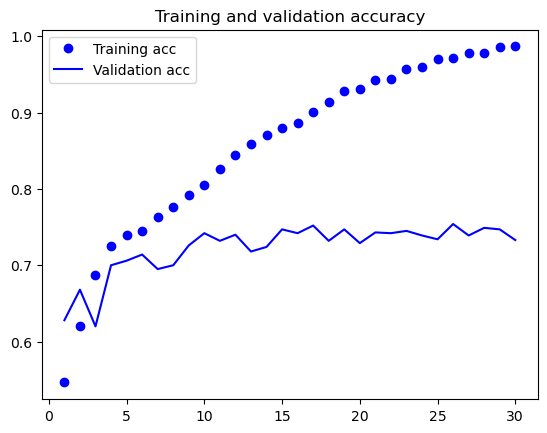

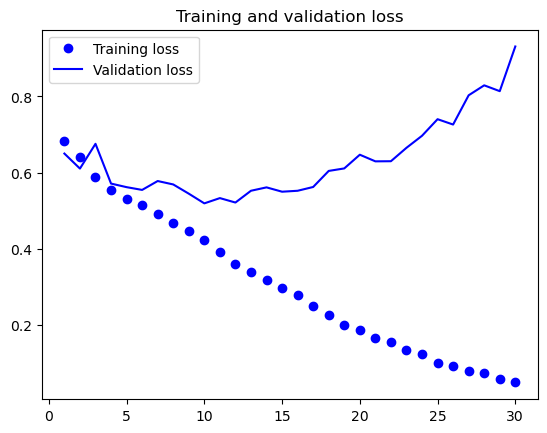

In [23]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


# Data Augmentation to fix Overfitting

In [40]:
datagen = ImageDataGenerator(
    rotation_range = 40, #rotate picture range (0-180)
    width_shift_range = 0.2, #shift pictures horizontal by percentage
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest' #goes with shift
)

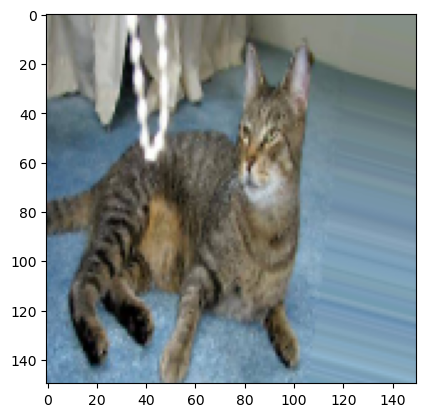

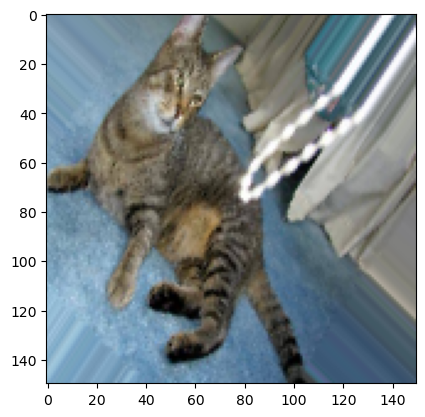

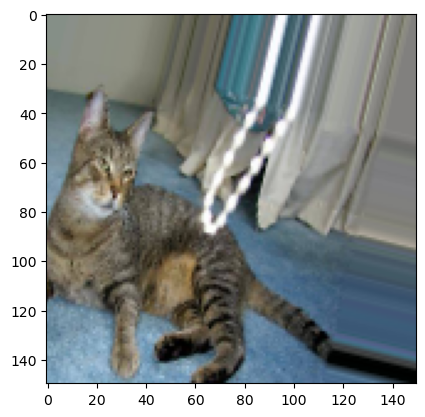

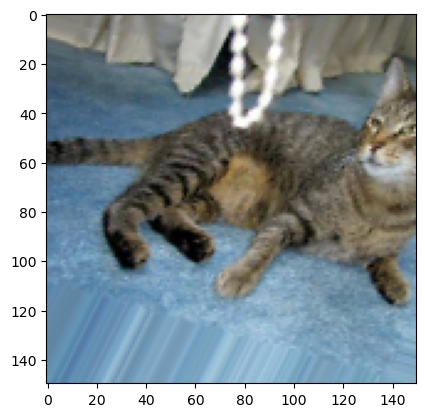

In [41]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3] #choose image to augment
img = image.load_img(img_path, target_size=(150,150))
x = image.img_to_array(img) #convert to numpy array with shape (150,150,3)
x = x.reshape((1,) + x.shape) #reshape to (1, 150, 150, 3)

i = 0
for batch in datagen.flow(x, batch_size=1): #generate infinite pictures
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()


## Retrain the model

When these transformations are applied, each time an image is loaded for training, it might appear slightly different due to the random transformations applied. This means the feature map produced by the convolutional base will also be different each time because the input image has been altered. So with each training epoch, the image varies a little.

Add dropout layer.

First compile a model. \
Then add ImageDataGenerator to indicate how to rescale or augment image. \
Then pass a directory through the ImageDataGenerator to process. \
Then predict the model on the output processed images. 

In [42]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3))) #input shape is an arbitary number
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [43]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/opt/homebrew/anaconda3/envs/py38/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [44]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40, 
    width_shift_range = 0.2, 
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255) # Do NOT apply augmentation on test and validation data

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150), #resize all images to (150,150)
    batch_size=20,
    class_mode = 'binary' #need binary label
    )

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150), #resize all images to (150,150)
    batch_size=20,
    class_mode = 'binary' #need binary label
    )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [45]:
history = model.fit_generator( #use fit_generator instead of fit
    train_generator, #yield train data batch endlessly
    steps_per_epoch=100, #2000 total training data, each batch is 20, so need 100 steps to complete 1 epoch
    epochs = 30, 
    validation_data = validation_generator,
    validation_steps=50) #1000 total validation data, each batch is 20, so need 1000 steps to complete 1 epoch

model.save('cats_and_dogs_small_2.h5')

/opt/homebrew/anaconda3/envs/py38/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 20s 195ms/step - loss: 0.6955 - acc: 0.5025 - val_loss: 0.6912 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 18s 184ms/step - loss: 0.6867 - acc: 0.5485 - val_loss: 0.6840 - val_acc: 0.5200
Epoch 3/30
100/100 [==============================] - 18s 181ms/step - loss: 0.6807 - acc: 0.5585 - val_loss: 0.6626 - val_acc: 0.6020
Epoch 4/30
100/100 [==============================] - 19s 186ms/step - loss: 0.6691 - acc: 0.5925 - val_loss: 0.6530 - val_acc: 0.6020
Epoch 5/30
100/100 [==============================] - 18s 183ms/step - loss: 0.6514 - acc: 0.6285 - val_loss: 0.6837 - val_acc: 0.5600
Epoch 6/30
100/100 [==============================] - 19s 185ms/step - loss: 0.6409 - acc: 0.6395 - val_loss: 0.7200 - val_acc: 0.5580
Epoch 7/30
100/100 [==============================] - 19s 185ms/step - loss: 0.6336 - acc: 0.6545 - val_loss: 0.5999 - val_acc: 0.6810
Epoch 8/30
100/100 [==============================] - 1

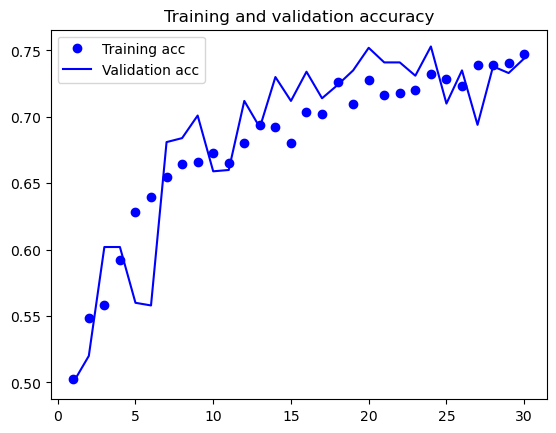

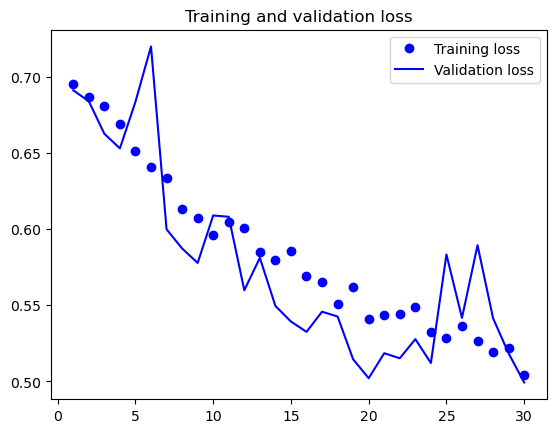

In [46]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Use Pretrained Model for Feature Extraction

In [48]:
from tensorflow.keras.applications import VGG16 #a pretrained model

conv_base = VGG16(weights= 'imagenet',
                  include_top = False, #does not include the dense layer
                  input_shape=(150,150,3) #the input image that you will feed to this network. optional, otherwise will process any shape.
                  )

conv_base.summary()

58900480/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

## Method 1: Fast Feature Extraction without Data Augmentation

recording the output of conv_base on your data \
then use these outputs as inputs to dense layer 

Cannot use data augmentation in this process because data augmentation is to generate a slightly different training data for every epoch. Here you are merely predict the (4,4,512) feature outputs on the original picture using conv_base

In [49]:
import numpy as np

In [52]:
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512)) #(4,4,512) is the last layer shape of the conv_base model above
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size = (150,150),
        batch_size = batch_size,
        class_mode = 'binary'
    )
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch) #use the above model to predict the input image
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i+1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count: #break after every image has been seen once
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [54]:
print("before reshape:", train_features.shape)
train_features = np.reshape(train_features, (2000, 4*4*512)) #flatten 3d to 1d. 
print("after reshape:", train_features.shape)

before reshape: (2000, 4, 4, 512)
after reshape: (2000, 8192)


In [56]:
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [57]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data = (validation_features, validation_labels))

Epoch 1/30
 11/100 [==>...........................] - ETA: 0s - loss: 0.7560 - acc: 0.5182 

/opt/homebrew/anaconda3/envs/py38/lib/python3.8/site-packages/keras/optimizer_v2/optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


100/100 [==============================] - 1s 6ms/step - loss: 0.6226 - acc: 0.6465 - val_loss: 0.4477 - val_acc: 0.8300
Epoch 2/30
100/100 [==============================] - 1s 6ms/step - loss: 0.4445 - acc: 0.7990 - val_loss: 0.3664 - val_acc: 0.8550
Epoch 3/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3672 - acc: 0.8410 - val_loss: 0.3235 - val_acc: 0.8830
Epoch 4/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3200 - acc: 0.8680 - val_loss: 0.2991 - val_acc: 0.8890
Epoch 5/30
100/100 [==============================] - 1s 5ms/step - loss: 0.2869 - acc: 0.8830 - val_loss: 0.2841 - val_acc: 0.8930
Epoch 6/30
100/100 [==============================] - 1s 5ms/step - loss: 0.2605 - acc: 0.8980 - val_loss: 0.2788 - val_acc: 0.8860
Epoch 7/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2473 - acc: 0.8960 - val_loss: 0.2678 - val_acc: 0.8900
Epoch 8/30
100/100 [==============================] - 1s 5ms/step - loss: 0.2298 - acc:

### Result shows better performance but overfit

Because this method can't accommondate data augmentation, which is essential for small image dataset

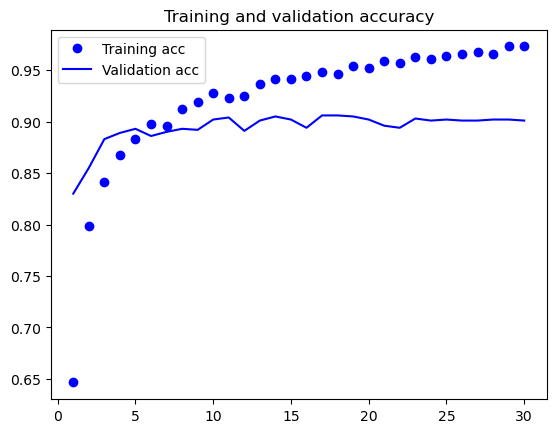

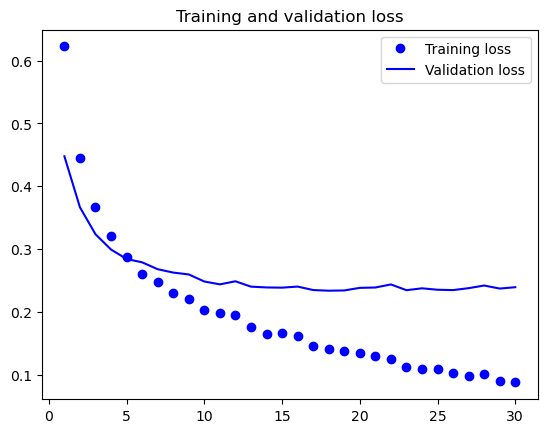

In [58]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Method 2: Feature Extraction with Data Augmentation (Don't run on CPU)

extend conv_base model \
then run it end to end on the inputs

Each input image is read multiple times through epochs

In [ ]:
model = models.Sequential()
model.add(conv_base) #add the pretrained model as a layer
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu')) #reduce feature space to 256, and more flexible to learn the pattern of flattened features
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False #freeze the pretrained conv_base model
#only train the two dense layers, resulting in 4 parameters (weight and bias from each dense layer)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [ ]:
#Then we can process the data using data augmentation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40, 
    width_shift_range = 0.2, 
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255) # Do NOT apply augmentation on test and validation data

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150), #resize all images to (150,150)
    batch_size=20,
    class_mode = 'binary' #need binary label
    )

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150), #resize all images to (150,150)
    batch_size=20,
    class_mode = 'binary' #need binary label
    )

history = model.fit_generator( #use fit_generator instead of fit
    train_generator, #yield train data batch endlessly
    steps_per_epoch=100, #2000 total training data, each batch is 20, so need 100 steps to complete 1 epoch
    epochs = 30, 
    validation_data = validation_generator,
    validation_steps=50) #1000 total validation data, each batch is 20, so need 1000 steps to complete 1 epoch

model.save('cats_and_dogs_small_3.h5')


## Method 3: Fine-Tuning

Fine-tuning consists of unfreezing a few of the top layers of a frozen model base used for feature extraction, and jointly training both the newly added part of the model (fully connected classifier) and these top layers. 

It's only possible to fine tune the top layers of hte conv base once the classifier on top has already been trained. If the classifier isn't already trained, then the error signal propagating through the network during training will be too large, and the representations previously learned by the layers being fine-tuned will be destroyed. 

Fine-Tuning flow: 
1. Add fully connected layers on top of a pretrained base network 
2. Freeze the base network 
3. Train the part you added 
4. Unfreeze some layers in the base network 
5. Jointly train both layers and the part you added

Why only train top layers:
1. Earlier layers in conv base encode more generic, reusable features.
2. The more parameters you are training, the more you are at risk of overfitting. 

In [60]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [61]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

for layer in conv_base.layers:
    print(f'{layer.name}: Trainable={layer.trainable}')

input_1: Trainable=False
block1_conv1: Trainable=False
block1_conv2: Trainable=False
block1_pool: Trainable=False
block2_conv1: Trainable=False
block2_conv2: Trainable=False
block2_pool: Trainable=False
block3_conv1: Trainable=False
block3_conv2: Trainable=False
block3_conv3: Trainable=False
block3_pool: Trainable=False
block4_conv1: Trainable=False
block4_conv2: Trainable=False
block4_conv3: Trainable=False
block4_pool: Trainable=False
block5_conv1: Trainable=True
block5_conv2: Trainable=True
block5_conv3: Trainable=True
block5_pool: Trainable=True


Learning rate is set to very low here because you want to limit the magnitude of the modifications you make to the representations of the three layers you are fine tuning. 

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
history = model.fit_generator(
    train_generator,
    setps_per_epoch = 100, 
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50
)

# Visualize